<a href="https://colab.research.google.com/github/MassGH2023/Supervised-Machine-Learning-Classification/blob/main/Diet_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from google.colab import files
from sklearn.preprocessing import LabelEncoder

In [2]:
# up = files.upload()

url = "https://raw.githubusercontent.com/MassGH2023/Supervised-Machine-Learning-Classification/refs/heads/main/datasets/Diet-Data.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
pd.set_option('display.max_columns', None)

df.head()

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Childhood_Trauma,Cardiovascular_Disease,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
0,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,Yes,No,No,No,No,No,7,7,2,2,3,1,7,3,3,7,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.
1,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,No,No,No,No,No,No,4,4,4,4,4,2,4,0,1,0,0,No,Daily,No Exercise,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.
2,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes,No,6,2,1,3,2,1,7,1,3,7,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
3,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,Yes,"Yes, not diagnosed by a doctor",No,No,Yes,No,2,3,1,2,5,3,5,5,5,7,1,No,Never,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
4,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,Yes,No,No,No,Yes,No,4,7,2,3,4,4,6,2,3,5,0,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.


In [5]:
df.columns

Index(['Age', 'Weight_kg', 'Height_ft', 'Marital_Status', 'PCOS',
       'Family_History_PCOS', 'Menstrual_Irregularity', 'Hormonal_Imbalance',
       'Hyperandrogenism', 'Hirsutism', 'Mental_Health',
       'Conception_Difficulty', 'Insulin_Resistance', 'Diabetes',
       'Childhood_Trauma', 'Cardiovascular_Disease', 'Diet_Bread_Cereals',
       'Diet_Milk_Products', 'Diet_Fruits', 'Diet_Vegetables',
       'Diet_Starchy_Vegetables', 'Diet_NonStarchy_Vegetables', 'Diet_Fats',
       'Diet_Sweets', 'Diet_Fried_Food', 'Diet_Tea_Coffee',
       'Diet_Multivitamin', 'Vegetarian', 'Exercise_Frequency',
       'Exercise_Type', 'Exercise_Duration', 'Sleep_Hours', 'Stress_Level',
       'Smoking', 'Exercise_Benefit', 'PCOS_Medication'],
      dtype='object')

In [6]:
df.dtypes

,0
Age,object
Weight_kg,float64
Height_ft,float64
Marital_Status,object
PCOS,object
Family_History_PCOS,object
Menstrual_Irregularity,object
Hormonal_Imbalance,object
Hyperandrogenism,object
Hirsutism,object


In [7]:
df["BMI"] = df['Weight_kg'] / ((df['Height_ft']/100) **2)

In [8]:
df.head()

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Childhood_Trauma,Cardiovascular_Disease,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication,BMI
0,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,Yes,No,No,No,No,No,7,7,2,2,3,1,7,3,3,7,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.,26.612956
1,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,No,No,No,No,No,No,4,4,4,4,4,2,4,0,1,0,0,No,Daily,No Exercise,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.,20.544420
2,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes,No,6,2,1,3,2,1,7,1,3,7,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.,31.669026
3,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,Yes,"Yes, not diagnosed by a doctor",No,No,Yes,No,2,3,1,2,5,3,5,5,5,7,1,No,Never,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.,21.479005
4,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,Yes,No,No,No,Yes,No,4,7,2,3,4,4,6,2,3,5,0,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.,21.479005


In [9]:
df.select_dtypes("O").columns

Index(['Age', 'Marital_Status', 'PCOS', 'Family_History_PCOS',
       'Menstrual_Irregularity', 'Hormonal_Imbalance', 'Hyperandrogenism',
       'Hirsutism', 'Mental_Health', 'Conception_Difficulty',
       'Insulin_Resistance', 'Diabetes', 'Childhood_Trauma',
       'Cardiovascular_Disease', 'Vegetarian', 'Exercise_Frequency',
       'Exercise_Type', 'Exercise_Duration', 'Sleep_Hours', 'Stress_Level',
       'Smoking', 'Exercise_Benefit', 'PCOS_Medication'],
      dtype='object')

In [10]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['Menstrual_Irregularity',
 'Hyperandrogenism',
 'Mental_Health',
 'Vegetarian',
 'Stress_Level',
 'Smoking']

In [12]:
df.PCOS.value_counts()

,count
PCOS,
No,134
Yes,38
"No, Yes, not diagnosed by a doctor",1


In [ ]:
df["PCOS"].replace('No, Yes, not diagnosed by a doctor', 'No', inplace= True)

In [14]:
df['Hirsutism'].value_counts()

,count
Hirsutism,
No,123
Yes,48
"No, Yes, not diagnosed by a doctor",2


In [15]:
three_cols = [col for col in df.columns if df[col].nunique() == 3]
values = []
for c in three_cols:
  values.append(df[c].value_counts())

In [16]:
values

[Marital_Status
 Unmarried    156
 Married       16
 Widow          1
 Name: count, dtype: int64,
 Family_History_PCOS
 No                                                            146
 Yes                                                            26
 Yes, not diagnosed by a doctor, Yes, diagnosed by a doctor      1
 Name: count, dtype: int64,
 Hirsutism
 No                                    123
 Yes                                    48
 No, Yes, not diagnosed by a doctor      2
 Name: count, dtype: int64,
 Insulin_Resistance
 No                                    151
 Yes                                    21
 No, Yes, not diagnosed by a doctor      1
 Name: count, dtype: int64,
 Diabetes
 No                                    169
 Yes                                     3
 No, Yes, not diagnosed by a doctor      1
 Name: count, dtype: int64,
 Childhood_Trauma
 No                                    106
 Yes                                    65
 No, Yes, not diagnosed by a doctor 

In [ ]:
df["Marital_Status"].replace(['Widow', 'Unmarried'], 'Single', inplace= True)
df["Family_History_PCOS"].replace('Yes, not diagnosed by a doctor, Yes, diagnosed by a doctor', 'Yes', inplace= True)
df["Hirsutism"].replace("No, Yes, not diagnosed by a doctor", 'Yes', inplace= True)
df["Insulin_Resistance"].replace("No, Yes, not diagnosed by a doctor", 'Yes', inplace= True)
df["Diabetes"].replace("No, Yes, not diagnosed by a doctor", 'Yes', inplace= True)
df["Childhood_Trauma"].replace("No, Yes, not diagnosed by a doctor", 'Yes', inplace= True)
df["Cardiovascular_Disease"].replace("No, Yes, not diagnosed by a doctor", 'Yes', inplace= True);
df["Conception_Difficulty"].replace(['Yes, not diagnosed by a doctor', 'Yes, diagnosed by a doctor', 'No, Yes, not diagnosed by a doctor'], 'Yes', inplace= True)


In [ ]:
values_to_replace = [
    'I took as endocrinologist prescribed me but she said that I don\'t have PCOS',
    'Glucophage',
    "Option 2", "Yes"
]
df["PCOS_Medication"].replace(['I took as endocrinologist prescribed me but she said that I don\'t have PCOS'], 'Yes', inplace= True)
df["PCOS_Medication"].replace("No.", 'No', inplace= True)


In [18]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols, len(binary_cols)

(['Marital_Status',
  'PCOS',
  'Family_History_PCOS',
  'Menstrual_Irregularity',
  'Hyperandrogenism',
  'Hirsutism',
  'Mental_Health',
  'Conception_Difficulty',
  'Insulin_Resistance',
  'Diabetes',
  'Childhood_Trauma',
  'Cardiovascular_Disease',
  'Vegetarian',
  'Stress_Level',
  'Smoking'],
 15)

In [19]:
df.select_dtypes(include = 'number').columns

Index(['Weight_kg', 'Height_ft', 'Diet_Bread_Cereals', 'Diet_Milk_Products',
       'Diet_Fruits', 'Diet_Vegetables', 'Diet_Starchy_Vegetables',
       'Diet_NonStarchy_Vegetables', 'Diet_Fats', 'Diet_Sweets',
       'Diet_Fried_Food', 'Diet_Tea_Coffee', 'Diet_Multivitamin', 'BMI'],
      dtype='object')

In [20]:
df['Exercise_Benefit'].value_counts()

,count
Exercise_Benefit,
Somewhat,110
Yes Significantly,26
Not at All,19
Not Much,18


In [21]:
cols = ['Marital_Status',
  'PCOS',
  'Family_History_PCOS',
  'Menstrual_Irregularity',
  'Hyperandrogenism',
  'Hirsutism',
  'Mental_Health',
  'Conception_Difficulty',
  'Insulin_Resistance',
  'Diabetes',
  'Childhood_Trauma',
  'Cardiovascular_Disease',
  'Vegetarian',
  'Stress_Level',
  'Smoking', 'Diet_Bread_Cereals', 'Diet_Milk_Products',
       'Diet_Fruits', 'Diet_Vegetables', 'Diet_Starchy_Vegetables',
       'Diet_NonStarchy_Vegetables', 'Diet_Fats', 'Diet_Sweets',
       'Diet_Fried_Food', 'Diet_Tea_Coffee', 'Diet_Multivitamin', 'BMI', "Sleep_Hours", "Exercise_Benefit"]

len(cols)

29

In [22]:
data = df[cols]

In [26]:
binary_cols = [col for col in data.columns if data[col].nunique() == 2]
binary_cols

['Marital_Status',
 'PCOS',
 'Family_History_PCOS',
 'Menstrual_Irregularity',
 'Hyperandrogenism',
 'Hirsutism',
 'Mental_Health',
 'Conception_Difficulty',
 'Insulin_Resistance',
 'Diabetes',
 'Childhood_Trauma',
 'Cardiovascular_Disease',
 'Vegetarian',
 'Stress_Level',
 'Smoking']

the following columns are ordinal and amongst them, 'Sleep_Hours'and
 'Exercise_Benefit' is not encoded yet.

In [24]:
ordinal_cols = binary_cols = [col for col in data.columns if (data[col].nunique() > 2) and col != 'BMI']
ordinal_cols

['Diet_Bread_Cereals',
 'Diet_Milk_Products',
 'Diet_Fruits',
 'Diet_Vegetables',
 'Diet_Starchy_Vegetables',
 'Diet_NonStarchy_Vegetables',
 'Diet_Fats',
 'Diet_Sweets',
 'Diet_Fried_Food',
 'Diet_Tea_Coffee',
 'Diet_Multivitamin',
 'Sleep_Hours',
 'Exercise_Benefit']

the binary columns are encoded using `pandas.get_dummies()`




In [27]:
data_enc = pd.get_dummies(data[binary_cols], drop_first= True)
data_enc

,Marital_Status_Single,PCOS_Yes,Family_History_PCOS_Yes,Menstrual_Irregularity_Yes,Hyperandrogenism_Yes,Hirsutism_Yes,Mental_Health_Yes,Conception_Difficulty_Yes,Insulin_Resistance_Yes,Diabetes_Yes,Childhood_Trauma_Yes,Cardiovascular_Disease_Yes,Vegetarian_Yes,Stress_Level_Yes,Smoking_Yes
0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,True,True,False,False,False,True,False,False,True,False
3,True,False,True,False,False,True,True,True,False,False,True,False,False,True,False
4,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,True,False,False,False,False,True,True,False,True,False,True,False,False,False,False
169,True,True,False,True,False,False,True,False,False,False,True,False,False,True,False
170,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False
171,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False


In [28]:
data['Sleep_Hours'].value_counts()

enc_sleep =LabelEncoder()
custom_order = ['Less than 6 hours', '6-8 hours', '9-12 hours', 'More than 12 hours']
enc_sleep.fit(custom_order)
data['Sleep_Hours_enc'] = enc_sleep.transform(data['Sleep_Hours'])


<ipython-input-28-ec0ba4484344>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sleep_Hours_enc'] = enc_sleep.transform(data['Sleep_Hours'])


In [29]:
data['Exercise_Benefit'].value_counts()

enc_ex =LabelEncoder()
custom_order2 = ['Not at All', 'Not Much', 'Somewhat', 'Yes Significantly']
enc_ex.fit(custom_order2)
data['Exercise_Benefit_enc'] = enc_ex.transform(data['Exercise_Benefit'])
# data['Exercise_Benefit_enc']

<ipython-input-29-72ff35d9200b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Exercise_Benefit_enc'] = enc_ex.transform(data['Exercise_Benefit'])


In [30]:
# data = data.drop(columns = ["Sleep_Hours" ,	"Exercise_Benefit"], axis = 1)
data.head()

,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hyperandrogenism,Hirsutism,Mental_Health,Conception_Difficulty,Insulin_Resistance,Diabetes,Childhood_Trauma,Cardiovascular_Disease,Vegetarian,Stress_Level,Smoking,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,BMI,Sleep_Hours,Exercise_Benefit,Sleep_Hours_enc,Exercise_Benefit_enc
0,Single,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,7,7,2,2,3,1,7,3,3,7,0,26.612956,Less than 6 hours,Somewhat,2,2
1,Single,No,No,No,No,No,No,No,No,No,No,No,No,No,No,4,4,4,4,4,2,4,0,1,0,0,20.544420,6-8 hours,Somewhat,0,2
2,Single,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,Yes,No,6,2,1,3,2,1,7,1,3,7,0,31.669026,6-8 hours,Somewhat,0,2
3,Single,No,Yes,No,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,2,3,1,2,5,3,5,5,5,7,1,21.479005,6-8 hours,Somewhat,0,2
4,Single,No,No,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,4,7,2,3,4,4,6,2,3,5,0,21.479005,6-8 hours,Not at All,0,1


In [31]:
data = data.drop(columns = binary_cols, axis  = 1)
data = pd.concat([data, data_enc], axis = 1)
data.head()

,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,BMI,Sleep_Hours,Exercise_Benefit,Sleep_Hours_enc,Exercise_Benefit_enc,Marital_Status_Single,PCOS_Yes,Family_History_PCOS_Yes,Menstrual_Irregularity_Yes,Hyperandrogenism_Yes,Hirsutism_Yes,Mental_Health_Yes,Conception_Difficulty_Yes,Insulin_Resistance_Yes,Diabetes_Yes,Childhood_Trauma_Yes,Cardiovascular_Disease_Yes,Vegetarian_Yes,Stress_Level_Yes,Smoking_Yes
0,7,7,2,2,3,1,7,3,3,7,0,26.612956,Less than 6 hours,Somewhat,2,2,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,4,4,4,4,4,2,4,0,1,0,0,20.544420,6-8 hours,Somewhat,0,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,6,2,1,3,2,1,7,1,3,7,0,31.669026,6-8 hours,Somewhat,0,2,True,False,True,False,False,True,True,False,False,False,True,False,False,True,False
3,2,3,1,2,5,3,5,5,5,7,1,21.479005,6-8 hours,Somewhat,0,2,True,False,True,False,False,True,True,True,False,False,True,False,False,True,False
4,4,7,2,3,4,4,6,2,3,5,0,21.479005,6-8 hours,Not at All,0,1,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False


In [35]:
data = data.drop(columns = ["Sleep_Hours" ,	"Exercise_Benefit"], axis = 1)

In [36]:
features = [x for x in data.columns if x != 'PCOS_Yes']
X = data[features]
y = data['PCOS_Yes']

# Logestic Regression

In [37]:
data.shape

(173, 29)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,  random_state= 42)
logmod = LogisticRegression (random_state= 42, penalty= 'l2', solver = 'lbfgs', max_iter = 1000, class_weight='balanced')

logmod.fit(X_train, y_train)

y_pred = logmod.predict(X_test)

In [51]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [52]:
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.7115384615384616,
 'recall': array([0.82051282, 0.38461538]),
 'precision': array([0.8       , 0.41666667]),
 'f1score': array([0.81012658, 0.4       ])}

If one class (e.g., class 0) has significantly more samples than the other, the model might favor the majority class. This often leads to higher recall for the majority class and lower recall for the minority class.

In [53]:
probabilities = logmod.predict_proba(X_test)[:,1]
probabilities

array([0.14699175, 0.1311745 , 0.0021481 , 0.31911758, 0.96917094,
       0.07629129, 0.03223567, 0.47439655, 0.73330228, 0.22912826,
       0.04433567, 0.03221528, 0.82635   , 0.16224882, 0.19392225,
       0.22202698, 0.11760006, 0.21926811, 0.23601239, 0.02890243,
       0.21404224, 0.23100962, 0.03441487, 0.00462802, 0.78606636,
       0.79869423, 0.36649147, 0.02490094, 0.07452713, 0.07813538,
       0.03233437, 0.82233393, 0.20839357, 0.4599831 , 0.99550909,
       0.0132719 , 0.8364275 , 0.08851618, 0.00818121, 0.26847552,
       0.8205646 , 0.50746811, 0.28811663, 0.04254139, 0.33866417,
       0.49684323, 0.92244494, 0.03165142, 0.17269691, 0.03485918,
       0.28769072, 0.86250616])

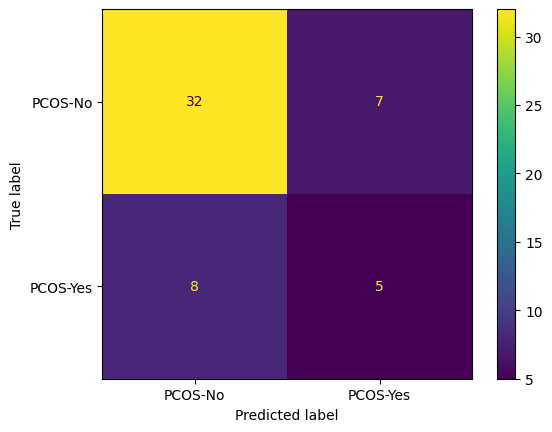

In [54]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=["PCOS-No", "PCOS-Yes"]).plot();


In [55]:
y_pred2 = (probabilities>0.3).astype(int)

In [67]:
evaluate_metrics(y_test, y_pred2)

{'accuracy': 0.75,
 'recall': array([0.76923077, 0.69230769]),
 'precision': array([0.88235294, 0.5       ]),
 'f1score': array([0.82191781, 0.58064516])}

In [57]:
y.value_counts()

,count
PCOS_Yes,
False,135
True,38


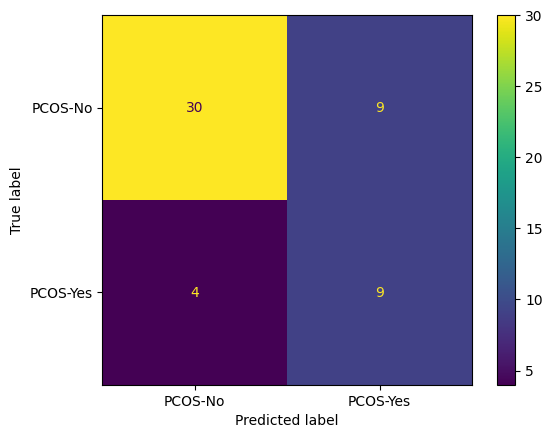

In [58]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred2), display_labels=["PCOS-No", "PCOS-Yes"]).plot();


In [109]:
logcoef = logmod.coef_[0]
feature_names = X.columns
coefdict = dict(zip(feature_names, logcoef))
coefdf = pd.DataFrame(coefdict, index=[0])
logcoefdt = coefdf.T.reset_index()
logcoefdt.columns = ["feature", 'Coef']

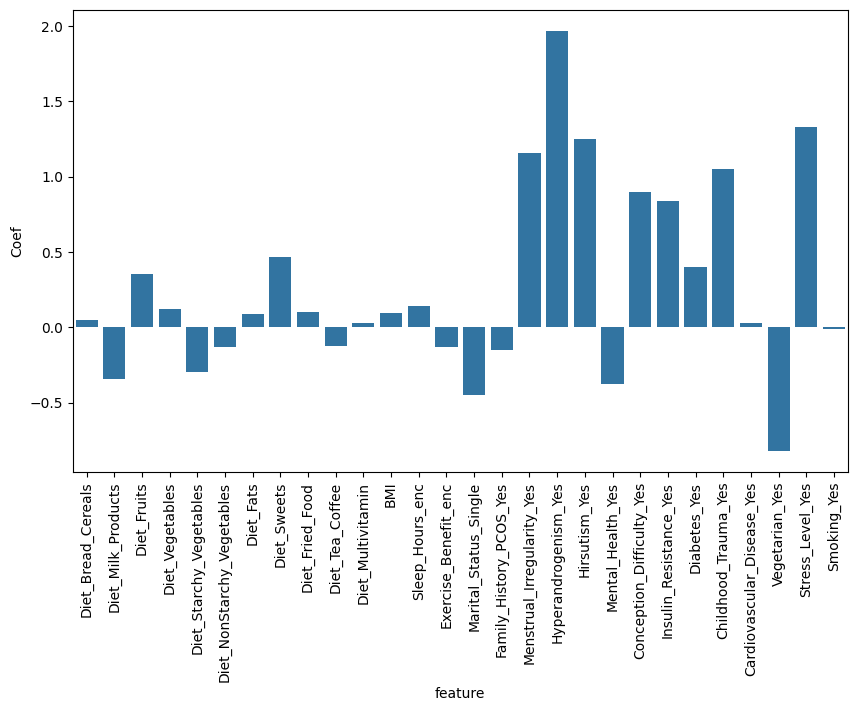

In [111]:
plt.figure(figsize = (10,6))
sns.barplot(x = logcoefdt["feature"], y = logcoefdt['Coef'])
plt.xticks(rotation=90)
plt.show()

# Decision tree

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [62]:
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path['ccp_alphas']
impurities = path['impurities']

In [64]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.007893,0.063144
2,0.009922,0.092910
3,0.013774,0.106684
4,0.027548,0.134232
5,0.028538,0.162771
6,0.028926,0.191696
7,0.136150,0.327846


In [65]:
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid,
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9339999999999999
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=6)


In [66]:
y_preddt = grid_search.best_estimator_.predict(X_test)

In [68]:
evaluate_metrics(y_test, y_preddt)

{'accuracy': 0.8269230769230769,
 'recall': array([0.94871795, 0.46153846]),
 'precision': array([0.84090909, 0.75      ]),
 'f1score': array([0.89156627, 0.57142857])}

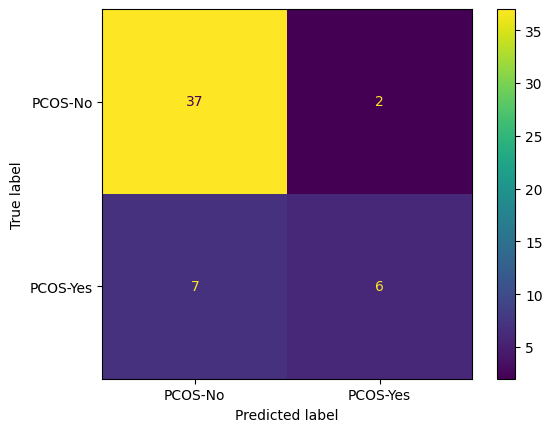

In [69]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_preddt), display_labels=["PCOS-No", "PCOS-Yes"]).plot();


In [70]:
dtclfs = []
for alfa in ccp_alphas[:-1]:
  dtclf = DecisionTreeClassifier(random_state= 42, ccp_alpha= alfa)
  dtclf.fit(X_train, y_train)
  dtclfs.append(dtclf)

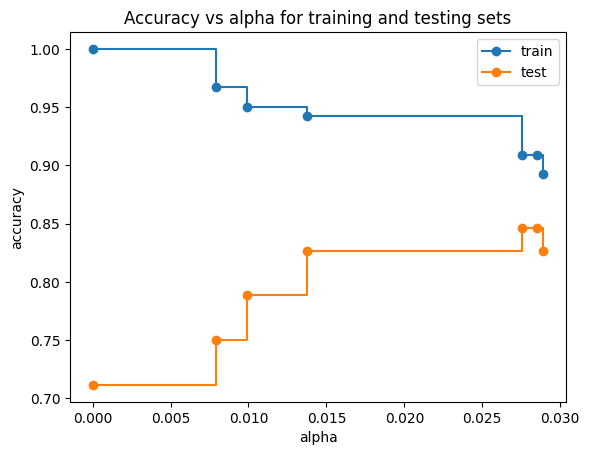

In [74]:
train_scores = [dtclf.score(X_train, y_train) for dtclf in dtclfs]
test_scores = [dtclf.score(X_test, y_test) for dtclf in dtclfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc=RandomForestClassifier(random_state=42)


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_
y_predrf = CV_rfc.best_estimator_.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [77]:
evaluate_metrics(y_test, y_predrf)

{'accuracy': 0.8076923076923077,
 'recall': array([0.94871795, 0.38461538]),
 'precision': array([0.82222222, 0.71428571]),
 'f1score': array([0.88095238, 0.5       ])}

In [80]:
feature_importances = CV_rfc.best_estimator_.feature_importances_
feature_importances

array([2.08674085e-02, 2.53865729e-02, 3.23040072e-02, 2.97110495e-02,
       1.91264964e-02, 2.95957100e-02, 1.80595770e-02, 4.22329250e-02,
       3.82524128e-02, 1.44489700e-02, 2.56087144e-02, 1.26319892e-01,
       1.47416931e-02, 2.41257831e-02, 8.44801808e-03, 7.53127752e-03,
       4.06319772e-02, 1.89837459e-01, 9.44695979e-02, 2.16044136e-02,
       5.14426677e-02, 5.28638300e-02, 9.51379119e-03, 3.58594711e-02,
       1.84193669e-03, 3.57591387e-03, 2.14586918e-02, 1.39741830e-04])

In [83]:
featdict = {}
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")
    featdict[feature] = importance

Diet_Bread_Cereals: 0.0209
Diet_Milk_Products: 0.0254
Diet_Fruits: 0.0323
Diet_Vegetables: 0.0297
Diet_Starchy_Vegetables: 0.0191
Diet_NonStarchy_Vegetables: 0.0296
Diet_Fats: 0.0181
Diet_Sweets: 0.0422
Diet_Fried_Food: 0.0383
Diet_Tea_Coffee: 0.0144
Diet_Multivitamin: 0.0256
BMI: 0.1263
Sleep_Hours_enc: 0.0147
Exercise_Benefit_enc: 0.0241
Marital_Status_Single: 0.0084
Family_History_PCOS_Yes: 0.0075
Menstrual_Irregularity_Yes: 0.0406
Hyperandrogenism_Yes: 0.1898
Hirsutism_Yes: 0.0945
Mental_Health_Yes: 0.0216
Conception_Difficulty_Yes: 0.0514
Insulin_Resistance_Yes: 0.0529
Diabetes_Yes: 0.0095
Childhood_Trauma_Yes: 0.0359
Cardiovascular_Disease_Yes: 0.0018
Vegetarian_Yes: 0.0036
Stress_Level_Yes: 0.0215
Smoking_Yes: 0.0001


In [90]:
featdf = pd.DataFrame(featdict, index=[0]).T.reset_index()
featdf.columns = ['Feature', 'Importance']

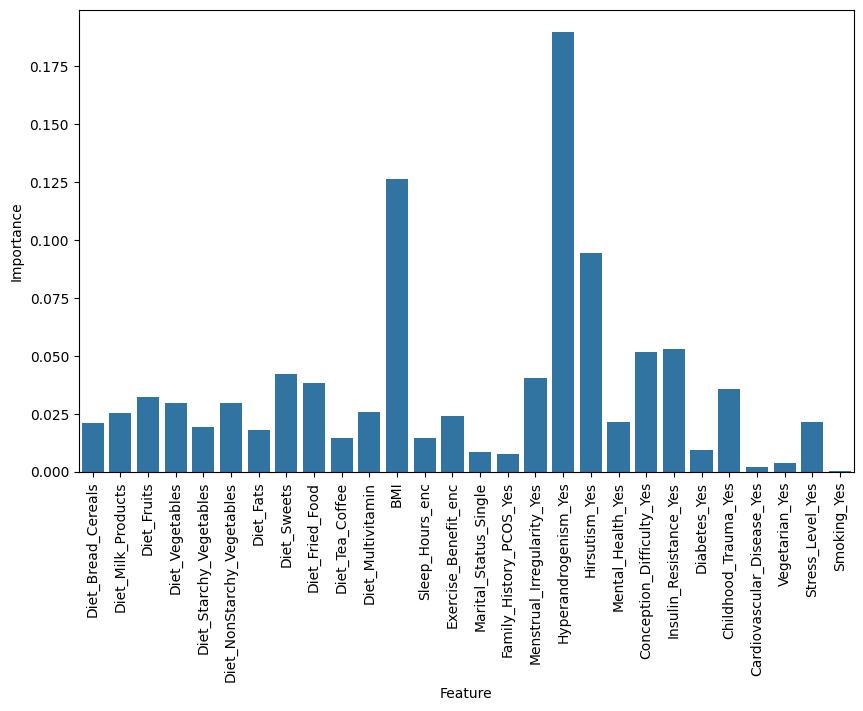

In [95]:
plt.figure(figsize = (10,6))
sns.barplot(x = featdf["Feature"], y = featdf['Importance'])
plt.xticks(rotation=90)
plt.show()